In [25]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataframe and glance at the description
telco_df = pd.read_csv("C:/Users/Nick/Desktop/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# inspect columns for odd values
for column in telco_df.columns[1:-3]:
    print(telco_df[column].unique()) # 0 values in some boolean columns need further investigation

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [4]:
# correct TotalCharges column from object to float64 datatype
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
telco_df['TotalCharges'].astype('float64', errors='raise')

# NaN values where tenure is 0, so we replace them with 0
telco_df[telco_df['TotalCharges'].isna()] = 0

In [5]:
# inspect columns for odd values
for column in telco_df.columns[1:-3]:
    print(telco_df[column].unique()) # 0 values in some boolean columns need further investigation

['Female' 'Male' 0]
[0 1]
['Yes' 'No' 0]
['No' 'Yes' 0]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes' 0]
['No phone service' 'No' 'Yes' 0]
['DSL' 'Fiber optic' 'No' 0]
['No' 'Yes' 'No internet service' 0]
['Yes' 'No' 'No internet service' 0]
['No' 'Yes' 'No internet service' 0]
['No' 'Yes' 'No internet service' 0]
['No' 'Yes' 'No internet service' 0]
['No' 'Yes' 'No internet service' 0]
['Month-to-month' 'One year' 'Two year' 0]
['Yes' 'No' 0]
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)' 0]


In [12]:
# after some inspection 'churn = 0' rows are discovered. Further exploration showed that all those rows are empty, so they are deleted
telco_df.drop(telco_df[telco_df['Churn'] == 0].index, inplace=True)
replace_cols = [
    'OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies'
]

for column in replace_cols:
    telco_df[column] = telco_df[column].replace({'No internet service': 'No'})
telco_df['MultipleLines'] = telco_df['MultipleLines'].replace({'No phone service': 'No'})
# inspect columns for odd values
for column in telco_df.columns[1:-3]:
    print(telco_df[column].unique()) #seems to be fine now

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [13]:
telco_df['Churn'].value_counts(normalize=True) * 100 # churn is ~26%

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

In [14]:
# examine churn rates across categorical variables
cat_cols = telco_df.select_dtypes(include=['boolean', 'object']).columns.difference(['Churn'])
for c in cat_cols:
    print(f"\n{c}")
    print(pd.crosstab(telco_df['Churn'], telco_df[c], normalize='columns'))


Contract
Contract  Month-to-month  One year  Two year
Churn                                       
No              0.572903  0.887228  0.971513
Yes             0.427097  0.112772  0.028487

Dependents
Dependents        No       Yes
Churn                         
No          0.687209  0.844688
Yes         0.312791  0.155312

DeviceProtection
DeviceProtection        No       Yes
Churn                               
No                0.713047  0.774607
Yes               0.286953  0.225393

InternetService
InternetService       DSL  Fiber optic        No
Churn                                           
No               0.810017     0.581072  0.925658
Yes              0.189983     0.418928  0.074342

MultipleLines
MultipleLines        No       Yes
Churn                            
No             0.749323  0.713515
Yes            0.250677  0.286485

OnlineBackup
OnlineBackup        No      Yes
Churn                          
No            0.707836  0.78433
Yes           0.292164  0.21567

O

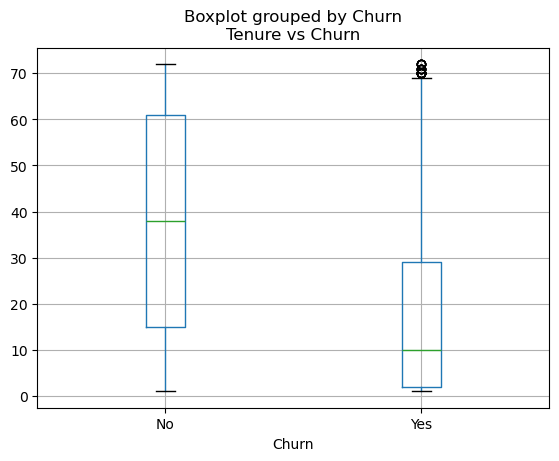

In [32]:
# data visualisation
telco_df.boxplot(column='tenure', by='Churn')
plt.title("Tenure vs Churn")
plt.show() # the pattern is shorter tenure -> more churn

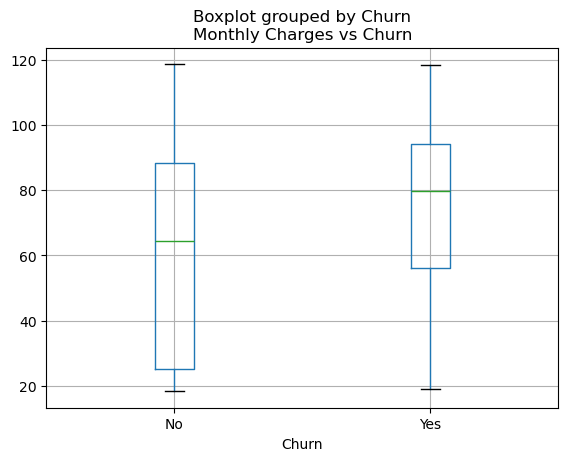

In [33]:
telco_df.boxplot(column='MonthlyCharges', by='Churn')
plt.title("Monthly Charges vs Churn")
plt.show() # the pattern is higher monthly charges -> more churn

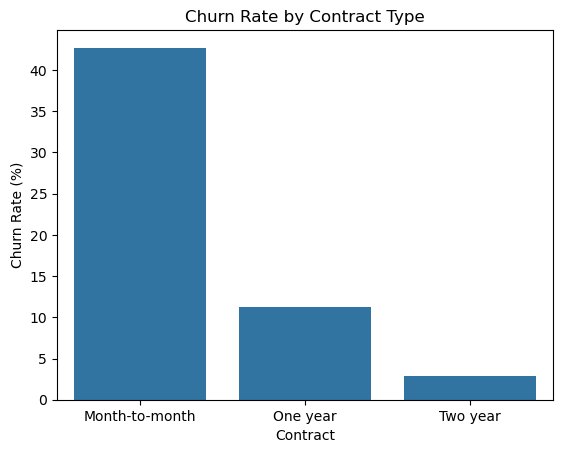

In [34]:
contract_churn = (telco_df.assign(ChurnNum = telco_df['Churn'].map({'Yes':1, 'No':0})).groupby('Contract')['ChurnNum'].mean().reset_index())
contract_churn['ChurnNum'] *= 100

sns.barplot(data=contract_churn, x='Contract', y='ChurnNum')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.show() # short-term contracts show the highest churn

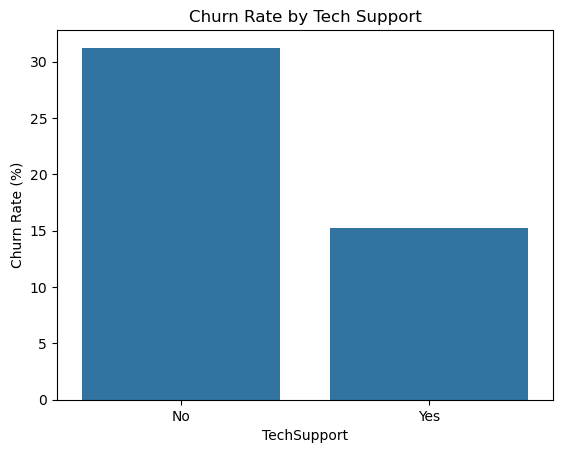

In [35]:
tech_churn = (telco_df.assign(ChurnNum = telco_df['Churn'].map({'Yes':1,'No':0}))
                        .groupby('TechSupport')['ChurnNum'].mean().reset_index())
tech_churn['ChurnNum'] *= 100

sns.barplot(data=tech_churn, x='TechSupport', y='ChurnNum')
plt.title("Churn Rate by Tech Support")
plt.ylabel("Churn Rate (%)")
plt.show()
